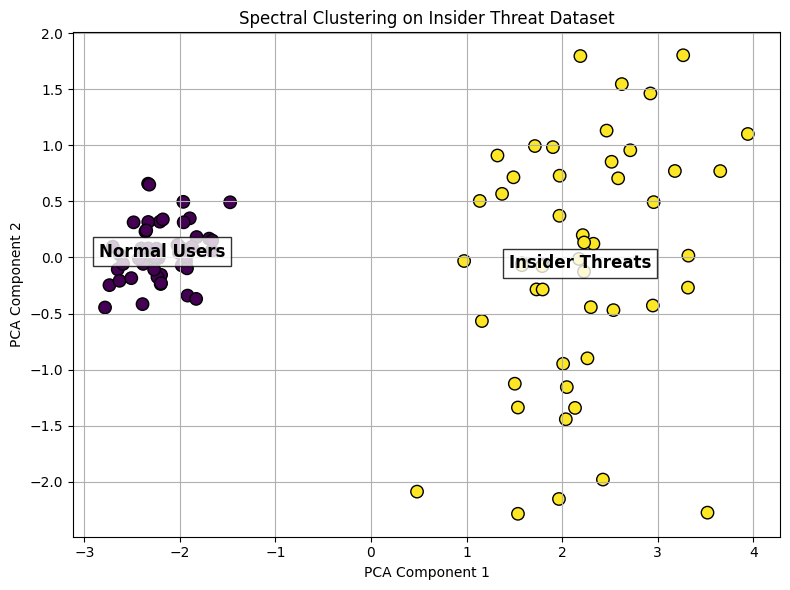

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import SpectralClustering
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv('insider_threat_dataset.csv')
X = df.drop(columns=['label'])

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Spectral Clustering
sc = SpectralClustering(n_clusters=2, affinity='rbf', gamma=1.0, random_state=42)
y_pred = sc.fit_predict(X_scaled)

# Reduce to 2D for plotting
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Convert cluster assignments to DataFrame for analysis
df_clustered = pd.DataFrame(X, columns=X.columns)
df_clustered['cluster'] = y_pred

# Determine which cluster is likely "Insider Threats"
cluster_means = df_clustered.groupby('cluster').mean()
insider_cluster = cluster_means['sensitive_file_accesses'].idxmax()
label_map = {insider_cluster: 'Insider Threats', 1 - insider_cluster: 'Normal Users'}

# Plot the clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap='viridis', s=80, edgecolor='k')
plt.title('Spectral Clustering on Insider Threat Dataset')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)

# Add labels for each cluster
for cluster_id in [0, 1]:
    # Get the center of the cluster in PCA space
    cluster_points = X_pca[y_pred == cluster_id]
    center = cluster_points.mean(axis=0)
    plt.text(center[0], center[1], label_map[cluster_id],
             fontsize=12, weight='bold', bbox=dict(facecolor='white', alpha=0.8),
             ha='center', va='center')

plt.tight_layout()
plt.show()
